In [1]:
#Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("data.csv")

KeyboardInterrupt: 

In [ ]:
df.columns

Index(['transaction_id', 'sender_id', 'receiver_id', 'timestamp', 'amount',
       'source', 'device_os', 'browser', 'zip_code', 'merchant_category',
       'ip_address', 'session_id', 'account_age_days', 'fraud_bool', 'pattern',
       'is_international', 'country_code', 'device_fingerprint',
       'merchant_risk_level', 'has_sufficient_funds', 'time_since_last_txn',
       'amount_velocity', 'device_match', 'amount_to_average_ratio',
       'velocity_6h', 'velocity_24h', 'velocity_4w', 'hour_of_day',
       'day_of_week', 'is_weekend', 'month', 'transaction_date'],
      dtype='object')

In [ ]:
new_df = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   transaction_id           1000000 non-null  object 
 1   sender_id                1000000 non-null  object 
 2   receiver_id              1000000 non-null  object 
 3   timestamp                1000000 non-null  object 
 4   amount                   1000000 non-null  float64
 5   source                   1000000 non-null  object 
 6   device_os                1000000 non-null  object 
 7   browser                  1000000 non-null  object 
 8   zip_code                 1000000 non-null  int64  
 9   merchant_category        1000000 non-null  object 
 10  ip_address               1000000 non-null  object 
 11  session_id               1000000 non-null  object 
 12  account_age_days         1000000 non-null  int64  
 13  fraud_bool               1000000 non-null  

In [ ]:
df.nunique()

transaction_id             1000000
sender_id                     4000
receiver_id                   4000
timestamp                   448251
amount                       50478
source                           5
device_os                        8
browser                          6
zip_code                      6704
merchant_category               15
ip_address                    6948
session_id                  999524
account_age_days              1359
fraud_bool                       2
pattern                         27
is_international                 2
country_code                     9
device_fingerprint           48676
merchant_risk_level              5
has_sufficient_funds             2
time_since_last_txn          32940
amount_velocity             744357
device_match                     2
amount_to_average_ratio     998697
velocity_6h                     14
velocity_24h                    20
velocity_4w                    159
hour_of_day                     24
day_of_week         

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount,1000000.0,77.087479,270.861661,0.0,15.000000,33.550000,76.000000,79799.890000
zip_code,1000000.0,49641.354071,29371.195722,514.0,24038.000000,50429.000000,74148.000000,99907.000000
account_age_days,1000000.0,751.901664,424.556838,30.0,397.000000,738.000000,1136.000000,1500.000000
fraud_bool,1000000.0,0.011056,0.104565,0.0,0.000000,0.000000,0.000000,1.000000
is_international,1000000.0,0.026603,0.160920,0.0,0.000000,0.000000,0.000000,1.000000
merchant_risk_level,997889.0,2.186545,1.413782,1.0,1.000000,2.000000,3.000000,5.000000
has_sufficient_funds,1000000.0,0.085052,0.278959,0.0,0.000000,0.000000,0.000000,1.000000
time_since_last_txn,996000.0,34.198334,79.193210,0.0,2.633333,7.100000,22.133333,1911.466667
amount_velocity,995069.0,59.510838,1511.002001,0.0,1.047732,4.496886,17.692469,877284.000000
device_match,1000000.0,0.271090,0.444523,0.0,0.000000,0.000000,1.000000,1.000000


In [ ]:
df.describe(include=["object", "bool"]).transpose()

,count,unique,top,freq
transaction_id,1000000,1000000,496255a2-b0b5-481a-88cb-eea0d6270c10,1
sender_id,1000000,4000,cb4038ba-0767-4a7d-9fab-17d0c8fcf4de,1517
receiver_id,1000000,4000,32269837-70d0-4334-a195-c011578c2551,1510
timestamp,1000000,448251,2023-01-18 06:25:00,11
source,1000000,5,MOBILE_APP,597132
device_os,1000000,8,Android,429200
browser,1000000,6,Unknown,703335
merchant_category,1000000,15,Restaurants,152921
ip_address,1000000,6948,214.50.1.236,1503
session_id,1000000,999524,bd3505a8-227b-44a7-84f2-fd155b7c8006,4


In [ ]:
fraud_vals = pd.DataFrame(df['fraud_bool'].value_counts()).reset_index()
fraud_vals.columns = ['fraud_bool', 'count']
print(fraud_vals)

   fraud_bool   count
0           0  988944
1           1   11056


In [ ]:
my_palette = sns.color_palette("husl", 2)
sns.set_style("whitegrid")

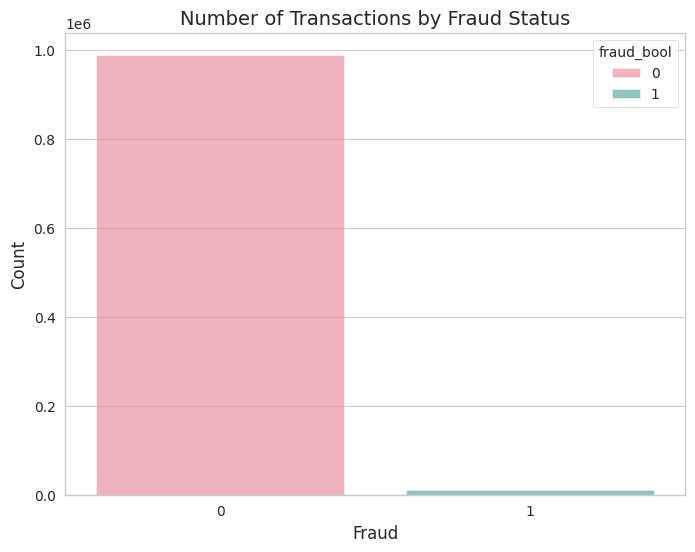

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=fraud_vals, x="fraud_bool", y="count", palette=my_palette, alpha=.6, hue="fraud_bool")
plt.xlabel("Fraud", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Number of Transactions by Fraud Status", fontsize=14)
plt.show()

In [ ]:
numeric_features = [x for x in df.columns if df[x].nunique() >= 10]
rm_features = ['transaction_id', 'sender_id', 'receiver_id', 'timestamp', 'session_id', 'ip_address', 'device_fingerprint', 'transaction_date', 'zip_code', 'month', "hour_of_day", "pattern", "merchant_category"]
numeric_features = [x for x in numeric_features if x not in rm_features]
print(numeric_features)


['amount', 'account_age_days', 'time_since_last_txn', 'amount_velocity', 'amount_to_average_ratio', 'velocity_6h', 'velocity_24h', 'velocity_4w']


In [ ]:
len(numeric_features)

8

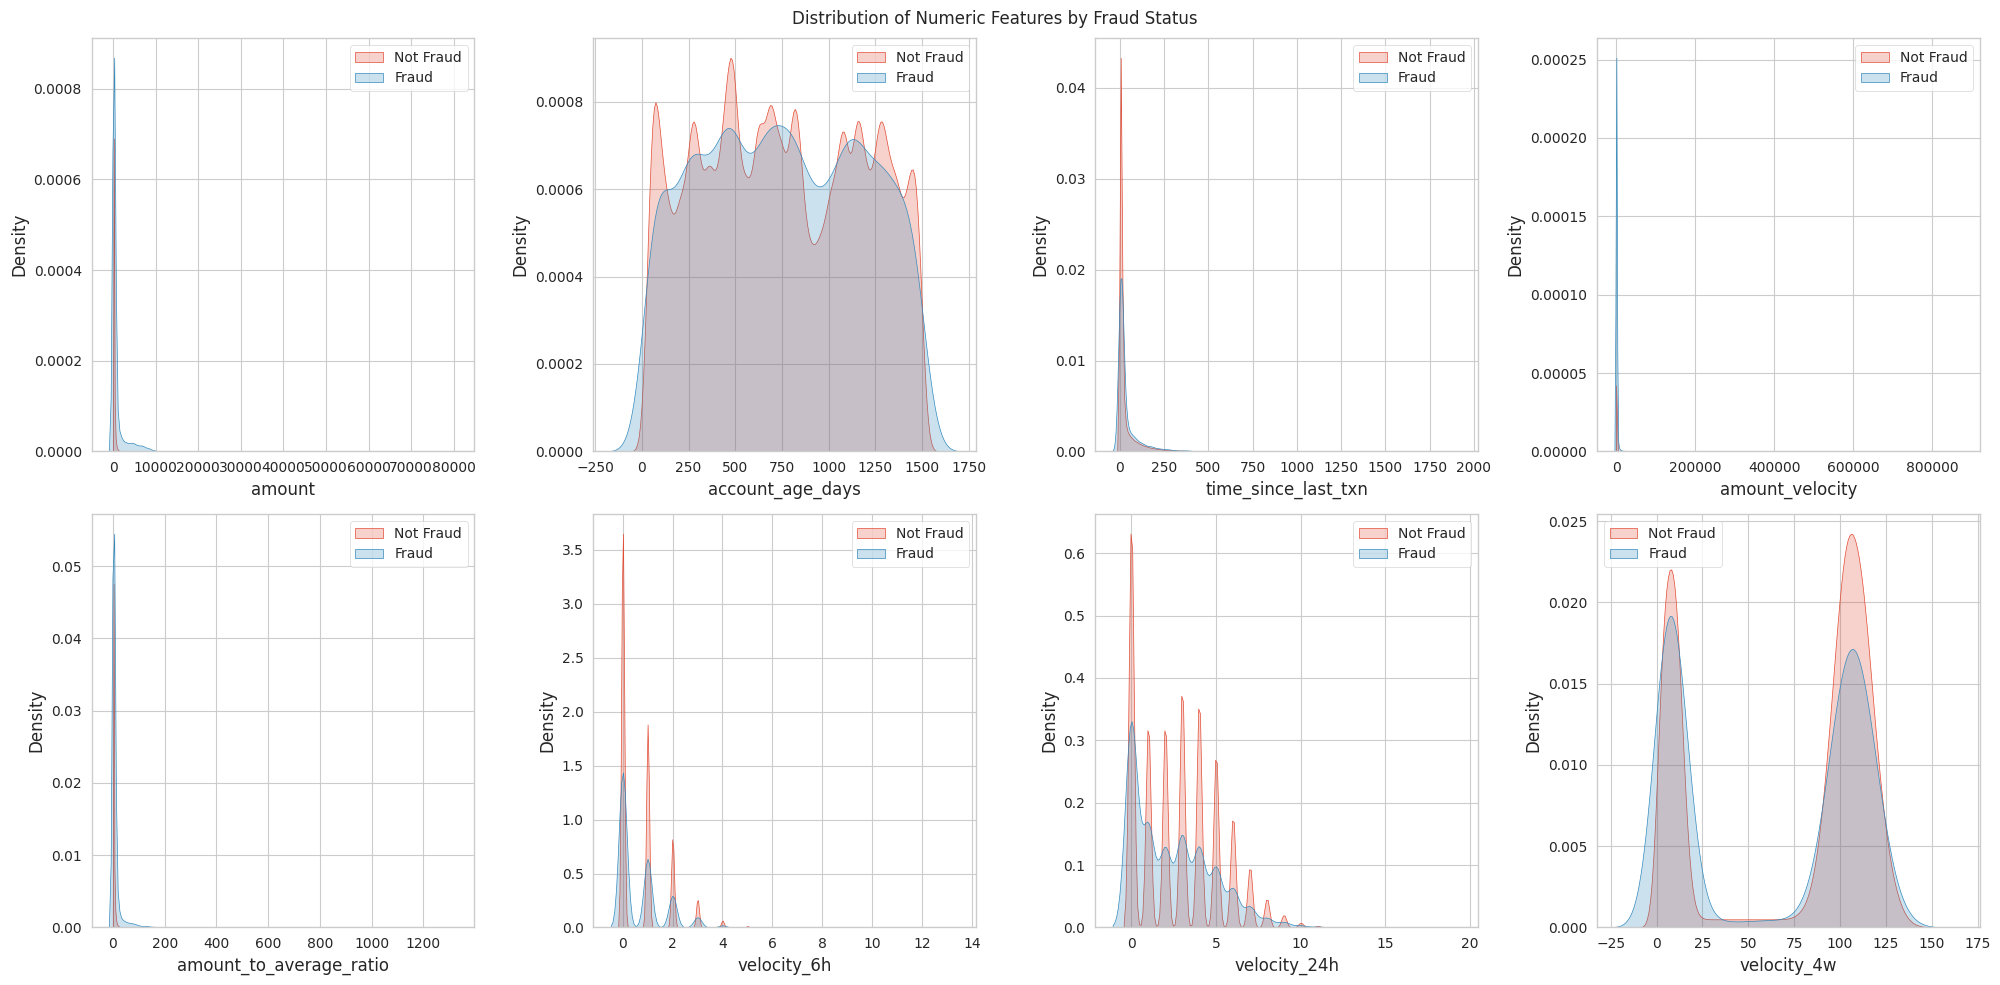

In [ ]:
# Calculate the number of rows and columns needed for the subplots
n_features = len(numeric_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate rows dynamically based on features

# Create a grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.kdeplot(data=df[df['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=df[df['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

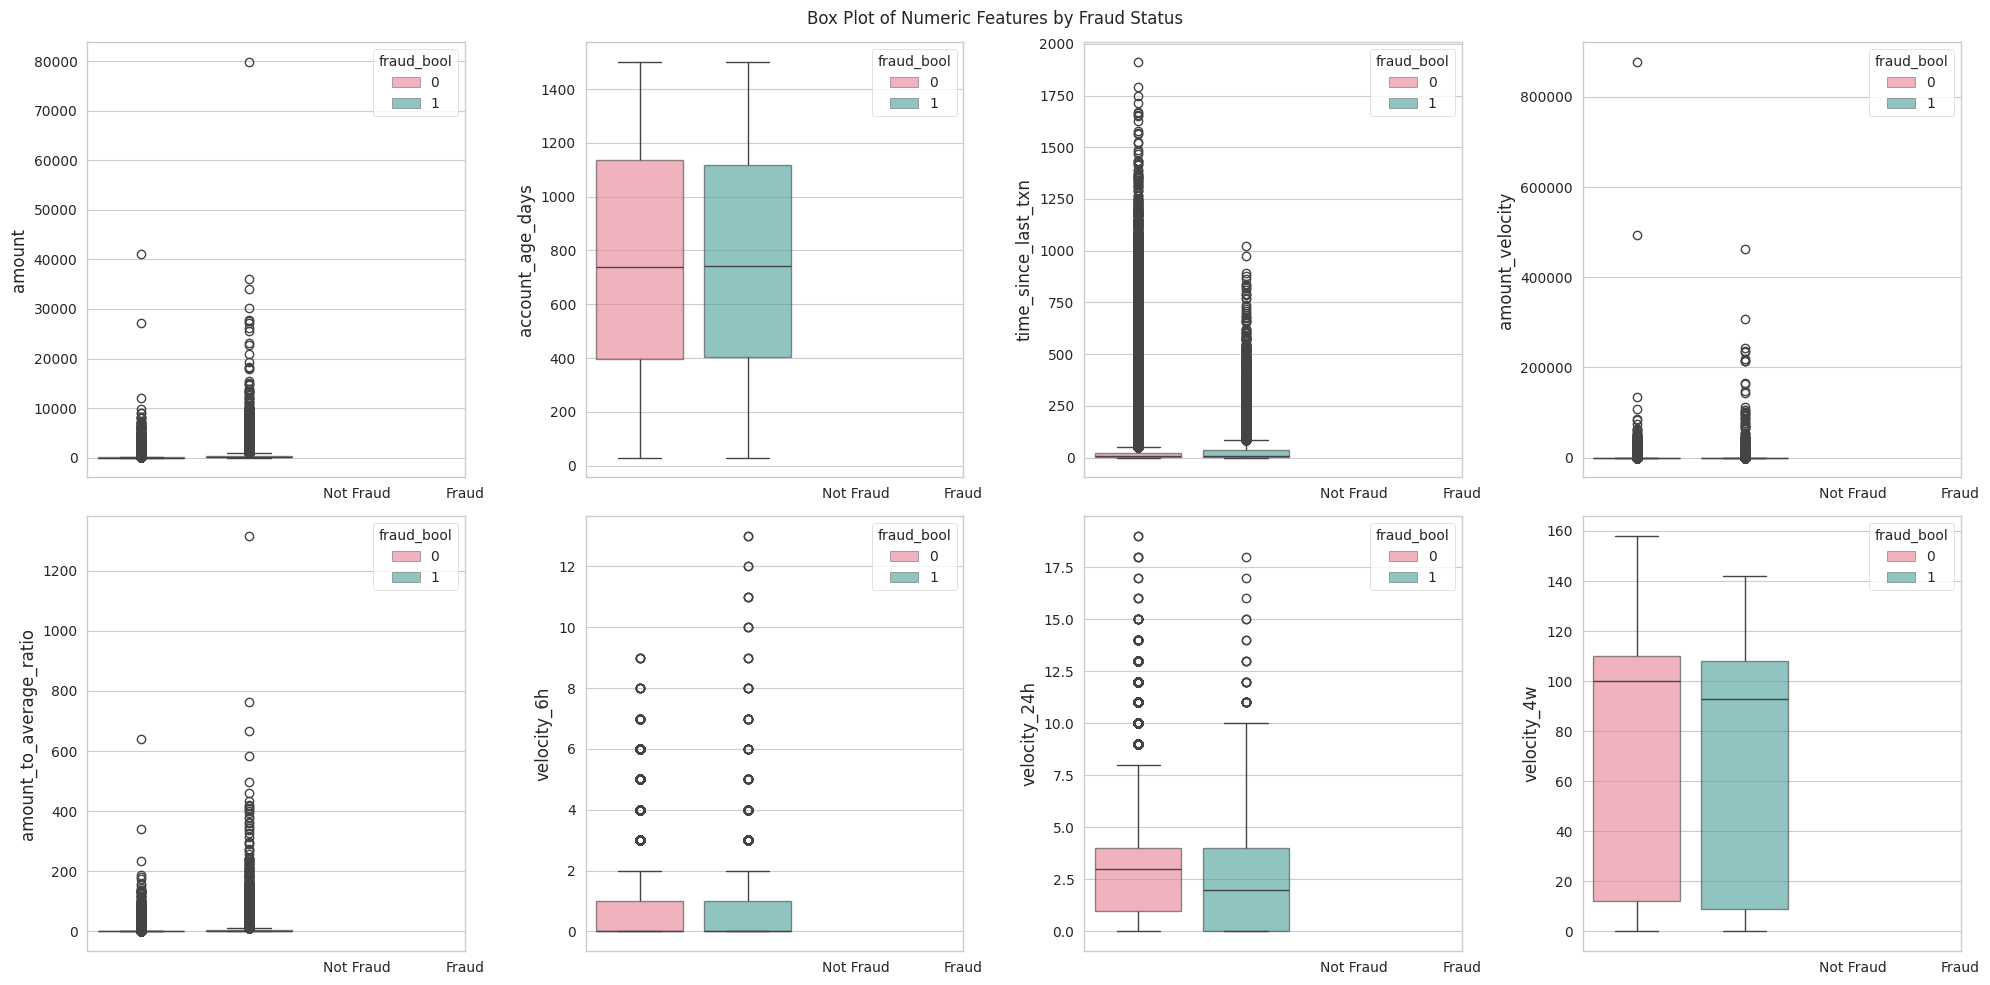

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Add a title to the figure
fig.suptitle('Box Plot of Numeric Features by Fraud Status')
axes = axes.flatten()
# Loop through the numeric features and plot a box plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.boxplot(data=df, x='fraud_bool', y=feature, ax=ax, palette=my_palette, hue= 'fraud_bool', boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.xaxis.set_ticks(['Not Fraud', 'Fraud'])
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
rm_features = ['transaction_id', 'sender_id', 'receiver_id', 'timestamp', 'zip_code', 'ip_address', 'session_id', 'device_fingerprint', 'fraud_bool', 'pattern', 'transaction_date']

categorical_features = [x for x in df.columns if x not in numeric_features and x not in rm_features]
print(categorical_features)

['source', 'device_os', 'browser', 'merchant_category', 'is_international', 'country_code', 'merchant_risk_level', 'has_sufficient_funds', 'device_match', 'hour_of_day', 'day_of_week', 'is_weekend', 'month']


In [ ]:
new_df = pd.get_dummies(new_df, columns=categorical_features, prefix=categorical_features)

In [ ]:
X = new_df.drop(['fraud_bool', 'pattern','transaction_id', 'sender_id', 'receiver_id', 'timestamp', 'zip_code', 'ip_address', 'session_id', 'device_fingerprint','transaction_date'], axis=1)
y = new_df['fraud_bool']

In [ ]:
import joblib
# Save feature columns after encoding
joblib.dump(X.columns.tolist(), "feature_columns.pkl")

['feature_columns.pkl']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

In [ ]:
numeric_transformer = RobustScaler()
preprocessor = ColumnTransformer([('scaled', numeric_transformer, numeric_features)], remainder='passthrough')
X_scaled = preprocessor.fit_transform(X)

In [ ]:
feature_names = preprocessor.get_feature_names_out()
feature_names = [feature.replace('remainder__', '') for feature in feature_names]
print(feature_names)

['scaled__amount', 'scaled__account_age_days', 'scaled__time_since_last_txn', 'scaled__amount_velocity', 'scaled__amount_to_average_ratio', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'source_ATM', 'source_MOBILE_APP', 'source_PHONE', 'source_POS', 'source_WEB', 'device_os_ATM_TERMINAL', 'device_os_Android', 'device_os_Linux', 'device_os_POS_TERMINAL', 'device_os_Unknown', 'device_os_Windows', 'device_os_iOS', 'device_os_macOS', 'browser_Chrome', 'browser_Edge', 'browser_Firefox', 'browser_Opera', 'browser_Safari', 'browser_Unknown', 'merchant_category_Account Management', 'merchant_category_Clothing', 'merchant_category_Electronics', 'merchant_category_Entertainment', 'merchant_category_Gambling', 'merchant_category_Gas', 'merchant_category_Gift Cards', 'merchant_category_Grocery', 'merchant_category_Health', 'merchant_category_Jewelry', 'merchant_category_Money Transfer', 'merchant_category_Online Services', 'merchant_category_Restaurants', 'merchant_categor

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=feature_names)

In [ ]:
X_scaled_clean = X_scaled.dropna()
y_clean = y[X_scaled_clean.index]
X_scaled = X_scaled_clean
y = y_clean

In [ ]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, chi2, mutual_info_classif
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [ ]:
%%time
print(f'Test dataset samples per class {Counter(y)}')

# Define the NearMiss undersampling object with a sampling strategy of 1 and all available CPU cores
nm = NearMiss(sampling_strategy=1, n_jobs=-1)

# Perform NearMiss undersampling on the feature matrix X and target variable y
X_scaled_nm, y_scaled_nm = nm.fit_resample(X_scaled, y)

# Print the number of occurrences of each class in the resampled dataset
print('Resampled dataset shape %s' % Counter(y_scaled_nm))

Test dataset samples per class Counter({0: 983355, 1: 10770})
Resampled dataset shape Counter({0: 10770, 1: 10770})
CPU times: user 2min 6s, sys: 1.3 s, total: 2min 8s
Wall time: 36 s


In [ ]:
categorical_features = [feature for feature in X_scaled_nm.columns if X_scaled_nm[feature].nunique() >= 2 and X_scaled_nm[feature].nunique() < 10]

print(categorical_features)

['source_ATM', 'source_MOBILE_APP', 'source_PHONE', 'source_POS', 'source_WEB', 'device_os_ATM_TERMINAL', 'device_os_Android', 'device_os_Linux', 'device_os_POS_TERMINAL', 'device_os_Unknown', 'device_os_Windows', 'device_os_iOS', 'device_os_macOS', 'browser_Chrome', 'browser_Edge', 'browser_Firefox', 'browser_Opera', 'browser_Safari', 'browser_Unknown', 'merchant_category_Account Management', 'merchant_category_Clothing', 'merchant_category_Electronics', 'merchant_category_Entertainment', 'merchant_category_Gambling', 'merchant_category_Gas', 'merchant_category_Gift Cards', 'merchant_category_Grocery', 'merchant_category_Health', 'merchant_category_Jewelry', 'merchant_category_Money Transfer', 'merchant_category_Online Services', 'merchant_category_Restaurants', 'merchant_category_Travel', 'merchant_category_Utilities', 'is_international_0', 'is_international_1', 'country_code_AU', 'country_code_CA', 'country_code_CN', 'country_code_IN', 'country_code_NG', 'country_code_RU', 'country_

In [ ]:
numeric_features = [feature for feature in X_scaled_nm.columns if X_scaled_nm[feature].nunique() >= 10]

print(numeric_features)

['scaled__amount', 'scaled__account_age_days', 'scaled__time_since_last_txn', 'scaled__amount_velocity', 'scaled__amount_to_average_ratio', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w']


In [ ]:
selector = VarianceThreshold()
selector.fit(X_scaled_nm)

# Get the names of the constant features
constant_features = [feature for feature in X_scaled_nm.columns 
                     if feature not in X_scaled_nm.columns[selector.get_support()]]

# Print the names of the constant features
print(constant_features)

[]


In [ ]:
new_df.drop(columns=constant_features, inplace=True)

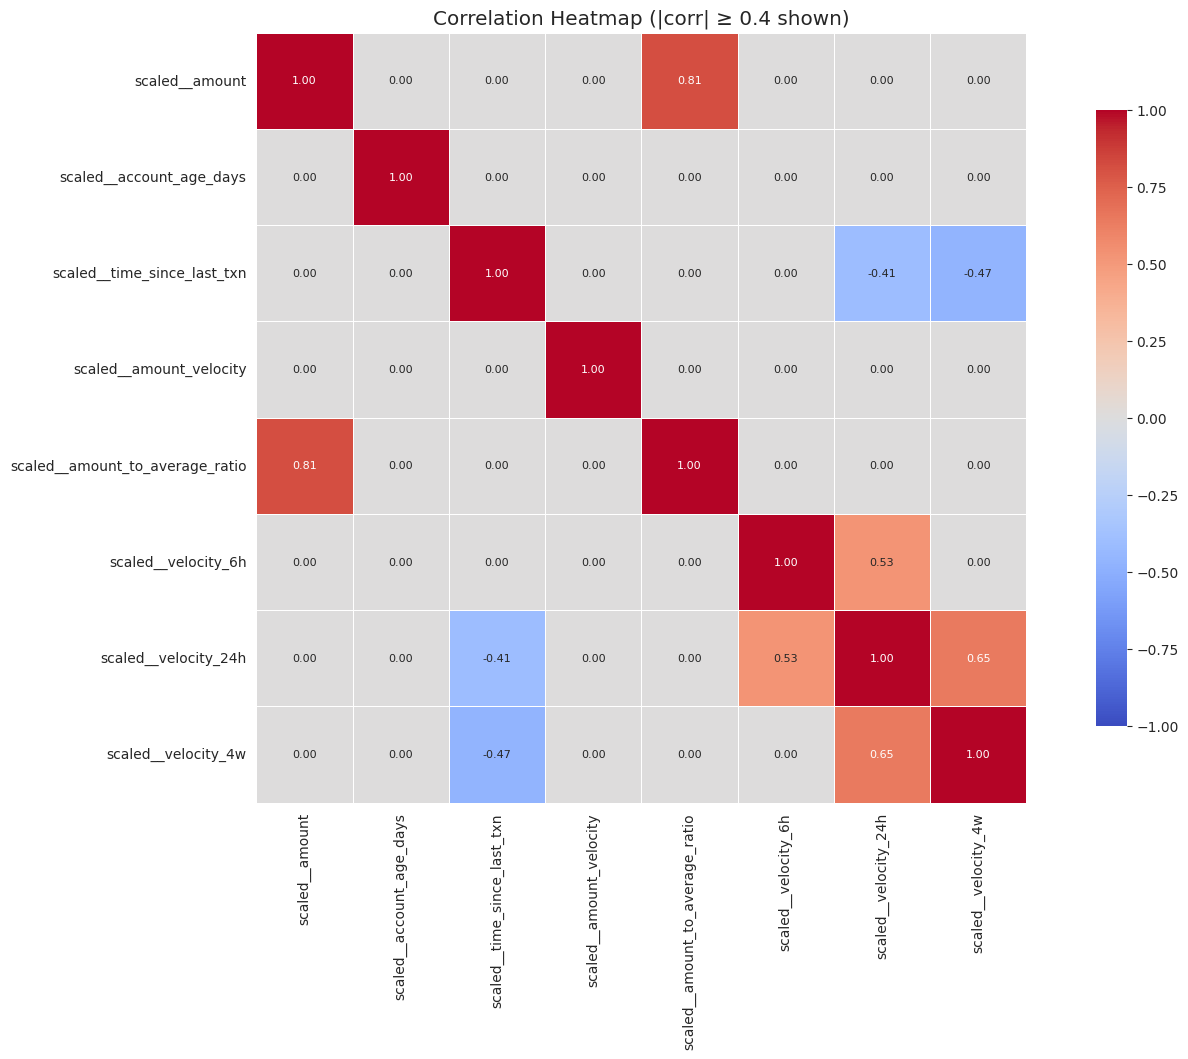

In [ ]:
X_train_corr = X_scaled_nm[numeric_features].corr()

# Instead of filtering with NaNs, mask weak correlations with 0
filtered_corr = X_train_corr.mask(X_train_corr.abs() < 0.4, other=0)

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=.5, square=True, ax=ax,
            annot_kws={"fontsize": 8}, vmin=-1, vmax=1,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap (|corr| ≥ 0.4 shown)')
plt.show()


In [ ]:
X_train_cat = X_scaled_nm[categorical_features].copy()

y_train_cat = y_scaled_nm.copy()

In [ ]:
# Use chi-squared test to evaluate the relationship between categorical features and the target variable
chi2_results = chi2(X_train_cat, y_train_cat)

In [ ]:
# Create a pandas DataFrame to store the chi-squared test results
chi2_results_df = pd.DataFrame(data={'feature': X_train_cat.columns, 'chi2': chi2_results[0], 'p_value': chi2_results[1]})

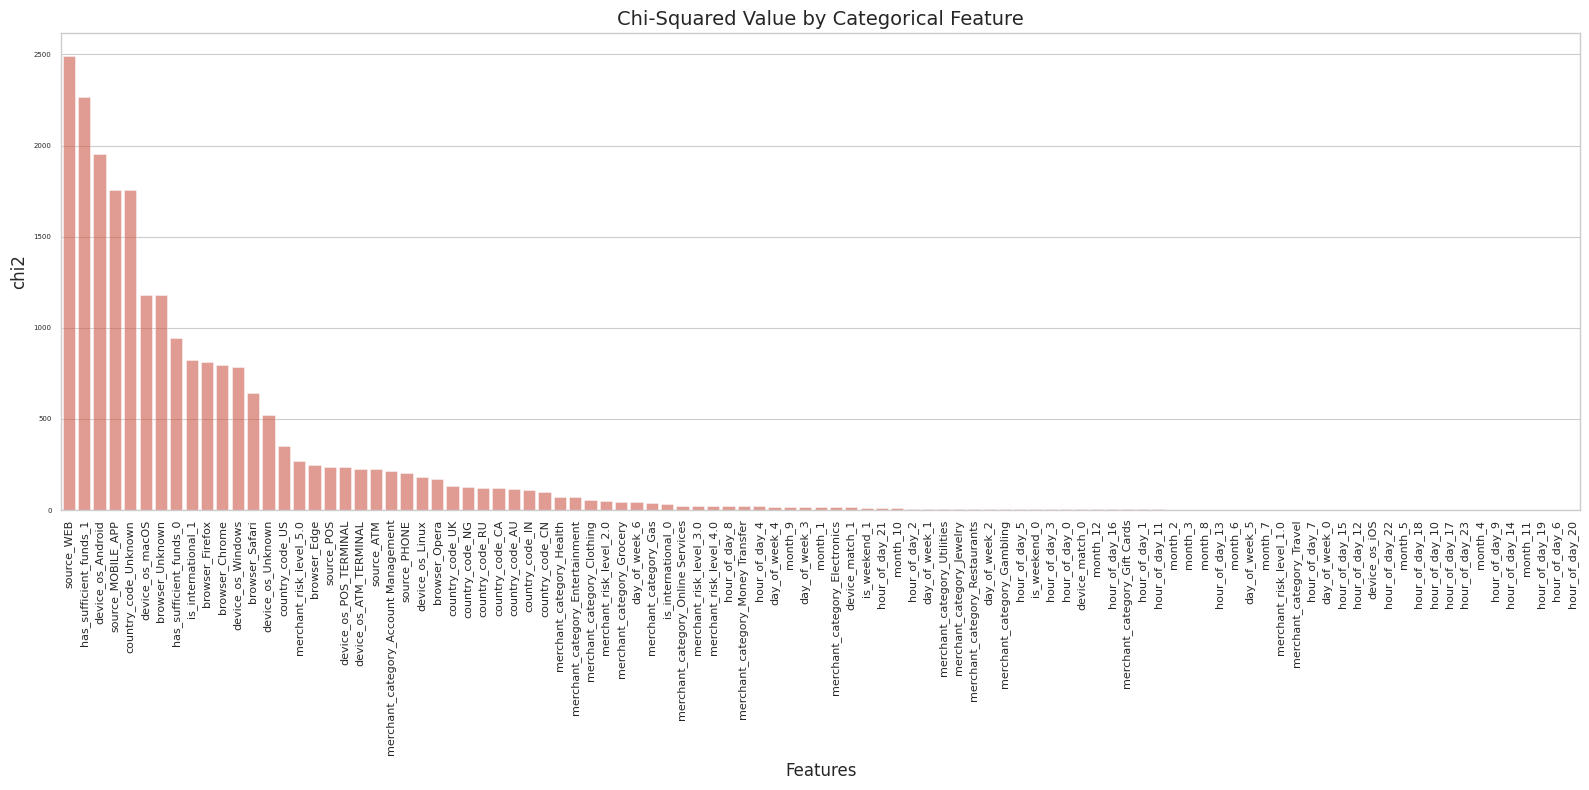

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=chi2_results_df.sort_values(by='chi2', ascending=False), x="feature", y="chi2", alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("chi2", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=5)
plt.title("Chi-Squared Value by Categorical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Use SelectKBest with chi-squared test to select the top 5 categorical features that are most strongly associated with the target variable
best_chi2_cols = SelectKBest(chi2, k=5)
best_chi2_cols.fit(X_train_cat, y_train_cat)

# Get the names of the top 5 features
best_chi2_features = [X_train_cat.columns[best_chi2_cols.get_support()]]

# Print the names of the top 5 features
print(best_chi2_features)

[Index(['source_MOBILE_APP', 'source_WEB', 'device_os_Android',
       'country_code_Unknown', 'has_sufficient_funds_1'],
      dtype='object')]


In [ ]:
#features to drop
# Features that are NOT statistically significant (p > 0.05)
low_significance_features = chi2_results_df[chi2_results_df['p_value'] > 0.05]['feature'].tolist()
print(len(low_significance_features))

28


In [ ]:
# Create a new DataFrame with only the numeric features from the preprocessed training data
X_train_num = X_scaled_nm[numeric_features].copy()

# Create a copy of the target variable
y_train_num = y_scaled_nm.copy()

In [ ]:
# Use mutual information test to evaluate the relationship between numerical features and the target variable
mutual_info_results = mutual_info_classif(X_train_num, y_train_num)

In [ ]:
# Create a pandas DataFrame to store the mutual information test results
mutual_info_results_df = pd.DataFrame(data={'feature': X_train_num.columns, 'mutual_info': mutual_info_results})

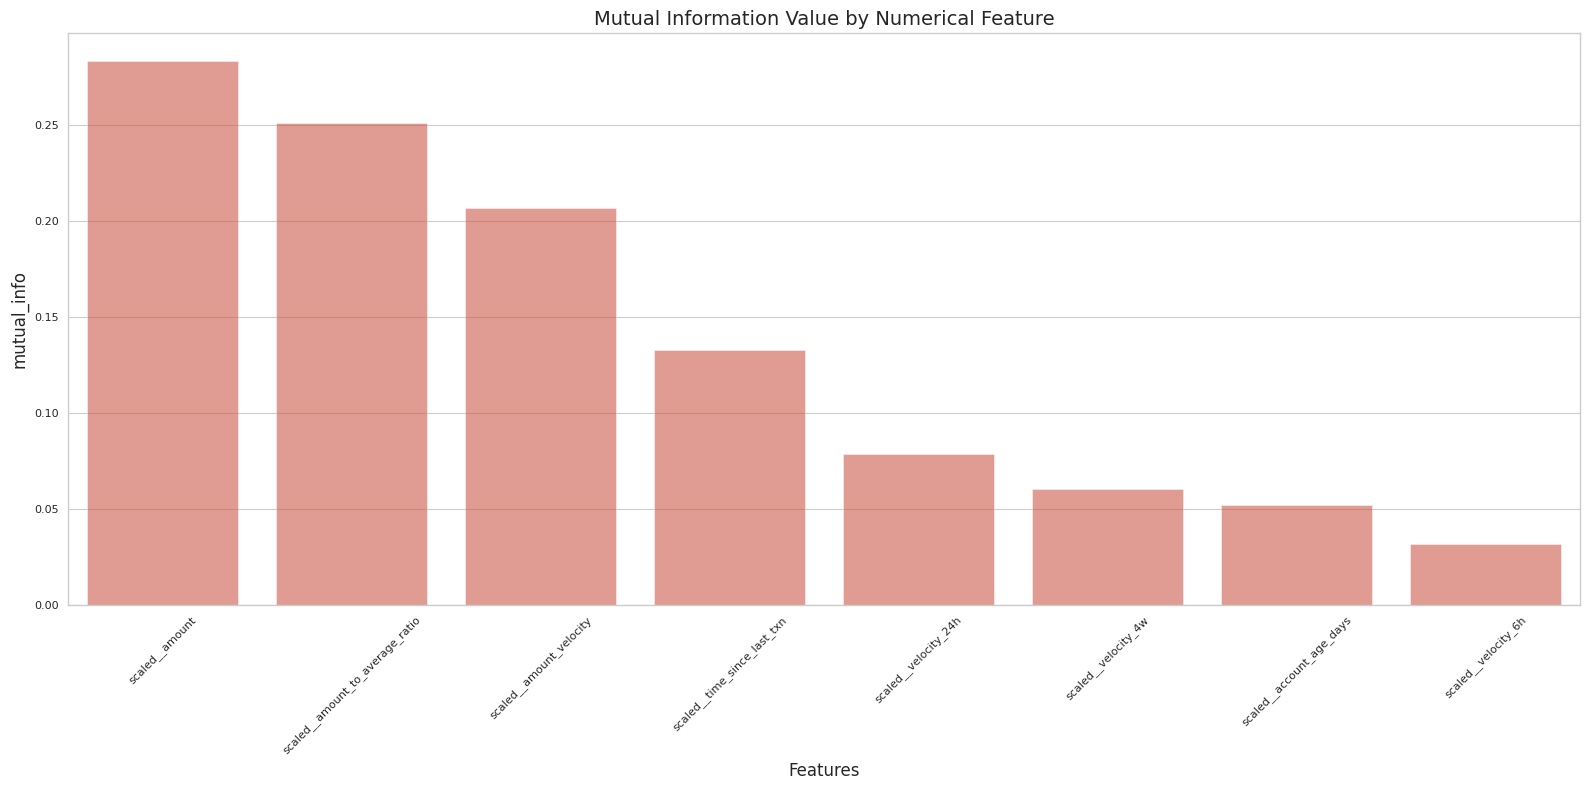

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=mutual_info_results_df.sort_values(by='mutual_info', ascending=False), x="feature", y="mutual_info", alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("mutual_info", fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Mutual Information Value by Numerical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
extra = ExtraTreesClassifier(n_estimators=50, random_state=0)
extra.fit(X_scaled_nm, y_scaled_nm)

# Create a SelectFromModel object with the fitted Random Forest model
feature_sel_extra = SelectFromModel(extra, prefit=True)

# Get the names of the selected features by calling .get_support() on the SelectFromModel object
best_extra_features = X_scaled_nm.columns[feature_sel_extra.get_support()].tolist()


# Print the names of the selected features
print(best_extra_features)

['scaled__amount', 'scaled__account_age_days', 'scaled__time_since_last_txn', 'scaled__amount_velocity', 'scaled__amount_to_average_ratio', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'source_MOBILE_APP', 'source_WEB', 'device_os_Android', 'device_os_macOS', 'browser_Unknown', 'country_code_US', 'country_code_Unknown', 'has_sufficient_funds_0', 'has_sufficient_funds_1']


In [ ]:
extra_importances = pd.DataFrame({'feature': X_scaled_nm.columns, 'importance': extra.feature_importances_, 'model': 'ExtraTreesClassifier'})

In [ ]:
# Set the importance threshold (e.g., keep features with importance > 0.01)
threshold = 0.01

# Filter the features based on the importance threshold
selected_features = extra_importances[extra_importances['importance'] > threshold]['feature'].tolist()

# Display the selected features
print(f"Selected Features based on importance threshold {threshold}:")
print(selected_features)


Selected Features based on importance threshold 0.01:
['scaled__amount', 'scaled__account_age_days', 'scaled__time_since_last_txn', 'scaled__amount_velocity', 'scaled__amount_to_average_ratio', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'source_MOBILE_APP', 'source_WEB', 'device_os_Android', 'device_os_macOS', 'browser_Unknown', 'country_code_US', 'country_code_Unknown', 'has_sufficient_funds_0', 'has_sufficient_funds_1']


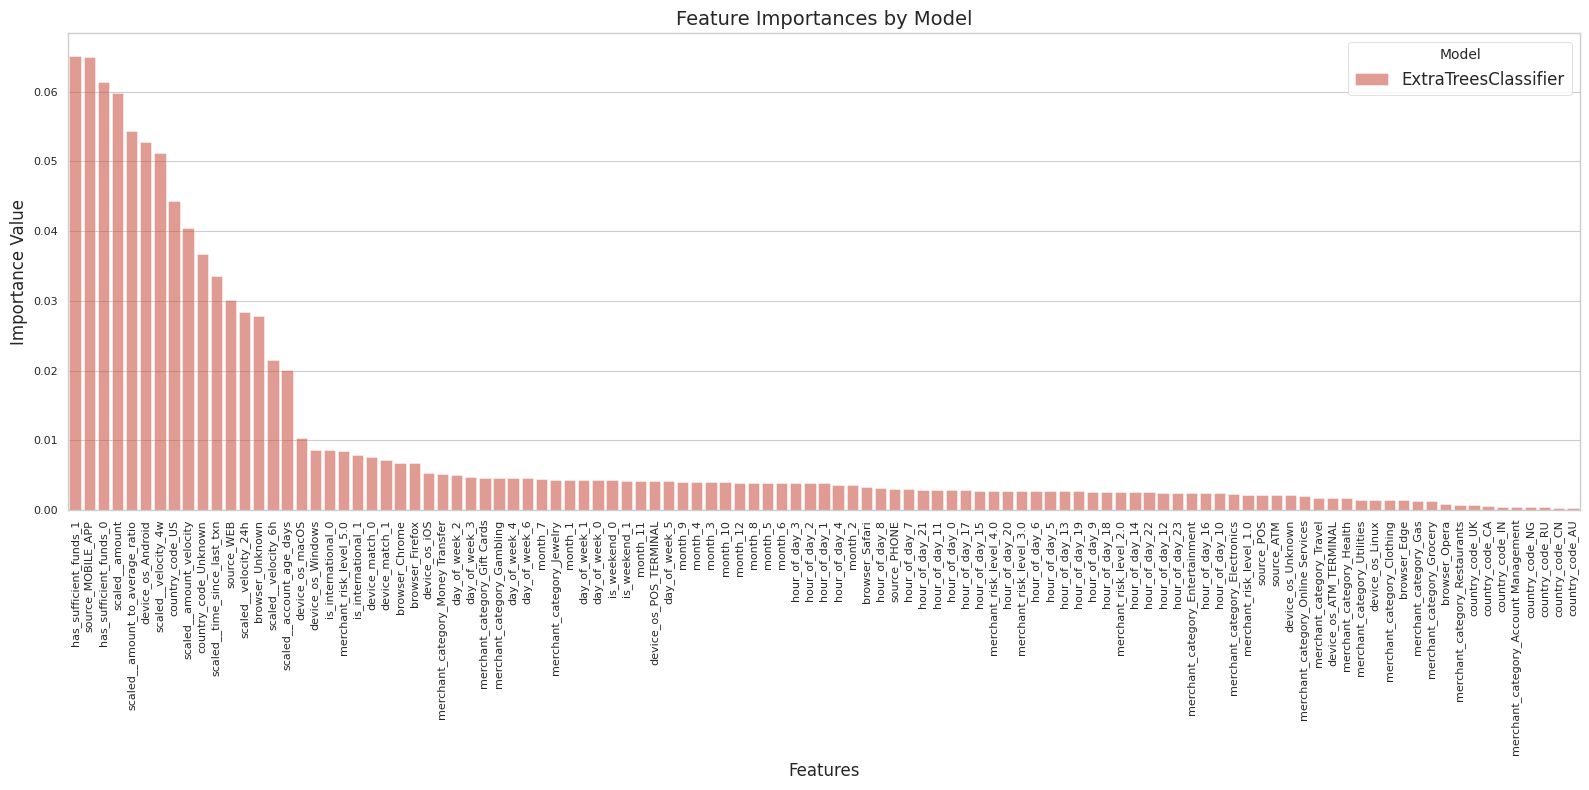

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create grouped bar plot
sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model",alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Value", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Feature Importances by Model", fontsize=14)
plt.legend(title='Model', fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Import the necessary libraries for oversampling imbalanced datasets
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import make_pipeline

In [ ]:
# Importing the necessary libraries for metrics and evaluation
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, auc, roc_curve

In [ ]:
def print_cls_report(y_test, y_pred, title):
    # Calculate the classification report
    default_report = classification_report(y_test, y_pred, target_names=['No Fraud', 'Fraud'])
    
    # Calculate precision, recall, f1 score and support for each class
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

    # Print the title and the default classification report
    print(title)
    print('*****' * 10)
    print(default_report)

    # Return the recall scores for each class
    return recall

In [ ]:
def plot_con_matrix(ax, y_test, y_pred, title):
    # Define the classes of the classification problem
    classes = ['No Fraud', 'Fraud']

    # Compute the confusion matrix
    con_matrix = confusion_matrix(y_test, y_pred)

    # Compute the values for true negatives, false positives, false negatives, and true positives
    tn, fp, fn, tp = con_matrix.ravel()

    # Compute the false positive rate
    fpr = fp / (fp + tn)

    # Plot the confusion matrix using a heatmap
    ax.imshow(con_matrix, interpolation='nearest', cmap=plt.cm.Blues)

    # Define the tick marks and the labels for the plot
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    # Add the count of each cell of the confusion matrix to the plot
    fmt = 'd'
    threshold = con_matrix.max() / 2.
    for i, j in np.ndindex(con_matrix.shape):
        ax.text(j, i, format(con_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if con_matrix[i, j] > threshold else "black")

    # Add labels to the plot
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(f'{title} with {fpr*100:.2f}% FPR')

In [ ]:
def print_cv_results(model):
    # Get the parameter and score arrays from the cv_results_ dictionary
    means = model.cv_results_['mean_test_score']
    params = model.cv_results_['params']

    # Combine the arrays using zip()
    combined_results = zip(means, params)

    # Sort the combined array by mean_test_score in descending order
    sorted_results = sorted(combined_results, key=lambda x: x[0], reverse=True)

    # Print the mean test score and the hyperparameters as a formatted string
    for mean, param in sorted_results:
        print("mean_test_score: %f, params: %r" % (mean, param))

In [ ]:
def plot_roc_curves(fpr_list, tpr_list, label_list):
    plt.figure(figsize=(8, 8))
    for i in range(len(fpr_list)):
        # Compute the ROC AUC score
        roc_auc_score = auc(fpr_list[i], tpr_list[i])
        # Plot the ROC curve
        plt.plot(fpr_list[i], tpr_list[i], label=f'{label_list[i]} (AUC={roc_auc_score:.2f})')
    
    # Plot the random classifier curve
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # Set the plot labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


In [ ]:
def test_classifier(classifier, X_test, y_test):
    """
    Evaluates a binary classifier by generating ROC curves, classification reports, and confusion matrices.
    
    Parameters:
    -----------
    classifier : classifier object
        Binary classifier object to be evaluated.
    X_test : numpy.ndarray or pandas.DataFrame
        Test feature data.
    y_test : numpy.ndarray or pandas.Series
        Test target labels.
        
    Returns:
    --------
    tuple : A tuple containing four values - false positive rate (fpr), true positive rate (tpr),
            default recall, and target recall.
    """
    
    # Predict class probabilities and labels using the trained classifier
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate and true positive rate for different threshold values
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Choose a false positive rate threshold based on the ROC curve
    target_fpr = 0.05
    threshold_idx = np.argmin(np.abs(fpr - target_fpr))
    threshold = thresholds[threshold_idx]
    
    # Make predictions on the testing set using the threshold
    y_pred_threshold = (y_prob >= threshold).astype(int)
    
    # Print the classification report for both default and target threshold
    default_recall = print_cls_report(y_test, y_pred, title="Default Threshold")
    target_recall = print_cls_report(y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    # Plot confusion matrix
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    default_matrix = plot_con_matrix(ax1, y_test, y_pred, title='Default Threshold @ 0.50')
    target_matrix = plot_con_matrix(ax2, y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    # Adjust subplots for better visibility
    plt.tight_layout()
    
    # Display the plots
    plt.show()

    return fpr, tpr, default_recall, target_recall


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Separate the feature matrix and target variable
X = new_df.drop(['fraud_bool', 'pattern','transaction_id', 'sender_id', 'receiver_id', 'timestamp', 'zip_code', 'ip_address', 'session_id', 'device_fingerprint','transaction_date'], axis=1)
y = new_df['fraud_bool']

In [ ]:
#['scaled__amount', 'scaled__account_age_days', 'scaled__time_since_last_txn', 'scaled__amount_velocity', 'scaled__amount_to_average_ratio', 'scaled__velocity_6h', 'scaled__velocity_24h', 'scaled__velocity_4w', 'source_MOBILE_APP', 'source_WEB', 'device_os_Android', 'device_os_macOS', 'browser_Unknown', 'country_code_US', 'country_code_Unknown', 'has_sufficient_funds_0', 'has_sufficient_funds_1']
X = new_df[['amount', 'account_age_days', 'time_since_last_txn', 'amount_velocity', 'amount_to_average_ratio', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'source_MOBILE_APP', 'source_WEB', 'device_os_Android', 'device_os_macOS', 'browser_Unknown', 'country_code_US', 'country_code_Unknown', 'has_sufficient_funds_0', 'has_sufficient_funds_1']]
y = new_df['fraud_bool']

In [ ]:
X= X.dropna()
y = y[X.index]

In [ ]:
len(X.columns)

17

In [ ]:
#Recursive feature elimination with xgboost
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create an XGBoost classifier
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
# Create an RFE object with the XGBoost classifier and the desired number of features to select
rfe = RFE(estimator=xgb, n_features_to_select=10)
# Fit the RFE object to the training data
rfe.fit(X_train, y_train)
# Get the selected features
selected_features = X_train.columns[rfe.support_]
# Print the selected features
print("Selected features:", selected_features)
# # Get the ranking of all features
# ranking = rfe.ranking_
# # Create a DataFrame with feature names and their rankings
# ranking_df = pd.DataFrame({'Feature': X_train.columns, 'Ranking': ranking})
# # Sort the DataFrame by ranking
# ranking_df = ranking_df.sort_values(by='Ranking')

# ranking_df.reset_index(drop=True, inplace=True)
# # Print the ranking DataFrame
# print(ranking_df)

Selected features: Index(['amount', 'amount_to_average_ratio', 'velocity_4w', 'source_MOBILE_APP',
       'device_os_Unknown', 'country_code_Unknown', 'merchant_risk_level_1.0',
       'merchant_risk_level_4.0', 'merchant_risk_level_5.0',
       'has_sufficient_funds_0'],
      dtype='object')


In [ ]:
%%time

# Perform NearMiss undersampling to handle imbalanced data
print(f'Test dataset samples per class {Counter(y)}')

# Define the NearMiss undersampling object with a sampling strategy of 0.1 and all available CPU cores
nm = NearMiss(sampling_strategy=0.1, n_jobs=-1)

# Perform NearMiss undersampling on the feature matrix X and target variable y
X_nm, y_nm = nm.fit_resample(X, y)

# Print the number of occurrences of each class in the resampled dataset
print('Resampled dataset shape %s' % Counter(y_nm))

Test dataset samples per class Counter({0: 983355, 1: 10770})
Resampled dataset shape Counter({0: 107700, 1: 10770})
CPU times: user 1min 5s, sys: 149 ms, total: 1min 5s
Wall time: 18.6 s


In [ ]:
# Import the necessary library for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.25, random_state=42, stratify=y_nm)

In [ ]:
# Get the indices of the encoded features in the training set
encoded_features = [X_train.columns.get_loc(str(feature)) for feature in X_train.columns if X_train[feature].nunique() >= 2 and X_train[feature].nunique() < 10]

In [ ]:
# Importing the pickle library to save and load machine learning models
import pickle

Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       1.00      0.80      0.89    505539
       Fraud       0.03      0.96      0.05      2998

    accuracy                           0.80    508537
   macro avg       0.51      0.88      0.47    508537
weighted avg       0.99      0.80      0.88    508537

Target Threshold @ 0.99
**************************************************
              precision    recall  f1-score   support

    No Fraud       1.00      0.95      0.97    505539
       Fraud       0.07      0.62      0.12      2998

    accuracy                           0.95    508537
   macro avg       0.53      0.79      0.55    508537
weighted avg       0.99      0.95      0.97    508537



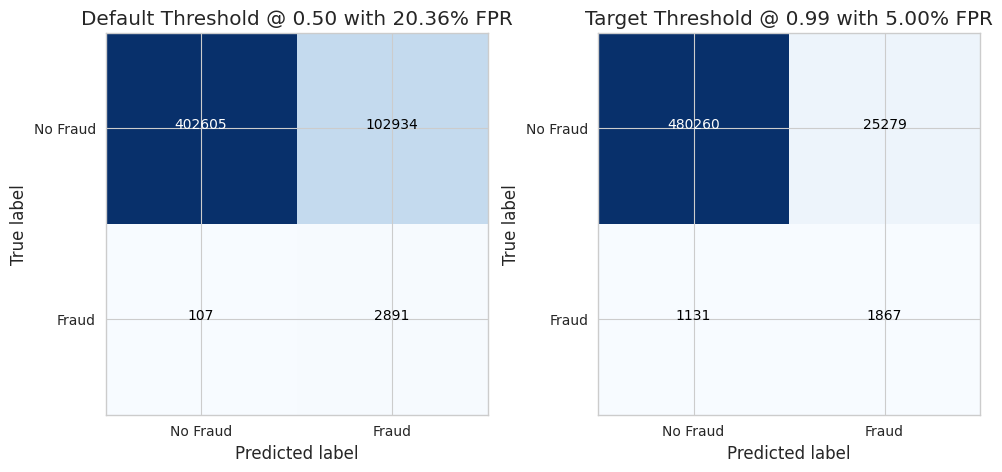

In [ ]:
# Testing final XGBoost model using the test data and calculating metrics
xgb_final_fpr, xgb_final_tpr, xgb_final_default_recall, xgb_final_target_recall = test_classifier(final_model, X, y)

In [1]:
import optuna
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import os

# Step 1: Train-validation split from the resampled dataset
X_train, X_val, y_train, y_val = train_test_split(X_nm, y_nm, test_size=0.2, random_state=42)

# Check if CUDA is available and set device accordingly
device = 'cuda' if os.environ.get('CUDA_VISIBLE_DEVICES') else 'cpu'

# Step 2: Define Optuna objective function
def objective(trial):
    param = {
        "tree_method": "hist",  # or "gpu_hist" if you are using GPU
        "device": device,
        "eval_metric": "auc",
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 10.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 1.0, 10.0),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1.0, 50.0),
        "random_state": 42  # Ensuring reproducibility
    }

    model = XGBClassifier(**param)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Using 5 splits
    aucs = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_t, X_v = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_t, y_t, eval_set=[(X_v, y_v)], verbose=False)
        y_probs = model.predict_proba(X_v)[:, 1]
        auc = roc_auc_score(y_v, y_probs)
        aucs.append(auc)

    return np.mean(aucs)

# Step 3: Run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, n_jobs=-1)  # Increase trials to 100 or more for better optimization

# Step 4: Output best hyperparameters
print("Best hyperparameters: ", study.best_params)

# Step 5: Train final model using the full dataset and best parameters
best_params = study.best_params
final_model = XGBClassifier(
    tree_method='hist',  # You can use "gpu_hist" if you have a GPU and it's supported
    device=device,
    eval_metric='auc',
    **best_params
)

final_model.fit(X_nm, y_nm)
# Save the final model using pickle
pickle.dump(final_model, open('xgb_final.pkl', 'wb'))

NameError: name 'X_nm' is not defined